文本分析的主要步骤；
读取数据
分词
剔除符号和无意义的停用词
字母变小写，词干化（英文）：upper/lower/isupper/islower
构建文档词频矩阵
聚类分析
可视化

聚类分析：
根据文档的相似性，对文档进行聚类->分词的重要性
步骤：
1.构建词的TF-IDF矩阵
TF-IDF-词频-逆文档频率:
TF=当前词语在文档中的出现次数/文档中的总数
IDF=log(总文档数/当前词出现的文档个数)
2.K-Means聚类/PCA降维/HC聚类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
#kMeans
import nltk
import jieba
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram,ward

kMeans:
nltk.cluster.kmeans.kMeansClusterer
num_means:聚类数目
diatance:距离的计算方法（相似的判定-距离判定）
nltk.cluster.util.cosine_distance 余弦距离-余弦相似度
nltk.cluster.util.euclidean_distance 欧几里得距离

In [10]:
words = ['计算机 操作系统 计算机 操作系统','程序设计语言 C语言 C++语言 java',' 操作系统 计算机 数据库','数据库 操作系统 多媒体 多媒体',' 操作系统 计算机网络 数据结构',' C语言 java语言 Python语言']

tv = TfidfVectorizer()
tv_fit = tv.fit_transform(words)
#文本的距离:0代表与自身距离为0
dtm = tv_fit.toarray()
kmeans = nltk.cluster.kmeans.KMeansClusterer(num_means=2,distance=nltk.cluster.util.cosine_distance)
kmeans.cluster(dtm)
labels = [kmeans.classify(i) for i in dtm]
labels

[0, 1, 0, 0, 0, 1]

In [ ]:
df = pd.read_csv("红楼梦预处理.csv",index_col=False,encoding='gbk')
df['chap_txt'][0]
text = []
for i in range(df.shape[0]):
    ls = jieba.lcut(df['chap_txt'][i])
    ls = list(filter(lambda x:len(x)>1,ls))
    text.append(" ".join(ls))
    #text.append(df['chap_txt'][i])
text

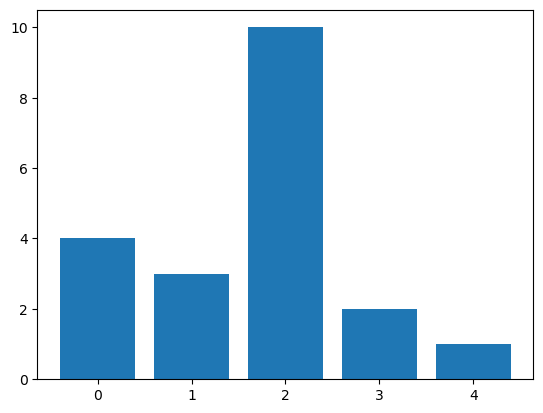

In [51]:
tv = TfidfVectorizer()
tv_fit = tv.fit_transform(text)
#文本的距离:0代表与自身距离为0
dtm = tv_fit.toarray()
kmeans = nltk.cluster.kmeans.KMeansClusterer(num_means=5,distance=nltk.cluster.util.cosine_distance)
kmeans.cluster(dtm)
labels = [kmeans.classify(i) for i in dtm]
# labels
df['label'] = pd.Series(labels)
df.loc[:,['chapter','label']]

df_group = df.groupby('label').count()
# list(df_group.chapter)
plt.bar(x=range(0,len(df_group)),height=list(df_group.chapter))
plt.show()

PCA主成分分析：
通过正交变换将一组可能存在的相关性变量转换为一组线性不相关的变量
from sklearn.decomposition import PCA
离得近的点是相似高的

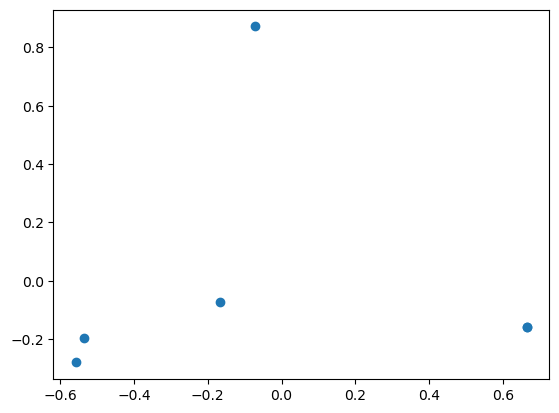

array([[-0.5347955 , -0.19802562],
       [ 0.66531497, -0.15955851],
       [-0.5573093 , -0.28042971],
       [-0.16708422, -0.07426879],
       [-0.0714409 ,  0.87184114],
       [ 0.66531497, -0.15955851]])

In [56]:
words = ['计算机 操作系统 计算机 操作系统','程序设计语言 C语言 C++语言 java',' 操作系统 计算机 数据库','数据库 操作系统 多媒体 多媒体',' 操作系统 计算机网络 数据结构',' C语言 java语言 Python语言']

tv = TfidfVectorizer()
tv_fit = tv.fit_transform(words)
#文本的距离:0代表与自身距离为0
dtm = tv_fit.toarray()

pca = PCA(n_components=2)
coord = pca.fit_transform(dtm)
plt.scatter(coord[:,0],coord[:,1])
plt.show()
coord

HC聚类：
层次聚类的步骤：
1.计算文档之间的距离
2.根据距离进行聚类
3.对聚类结果可视化
from sklearn

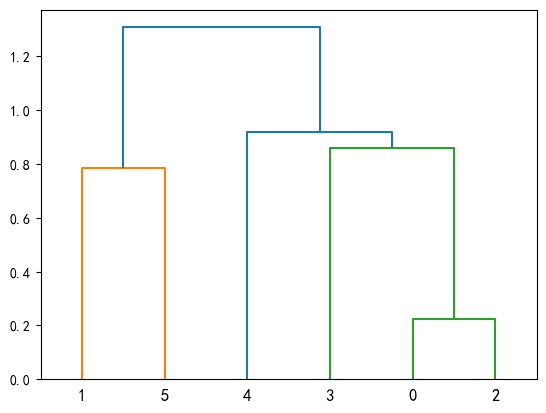

In [66]:
words = ['计算机 操作系统 计算机 操作系统','程序设计语言 C语言 C++语言 java',' 操作系统 计算机 数据库','数据库 操作系统 多媒体 多媒体',' 操作系统 计算机网络 数据结构',' C语言 java语言 Python语言']

tv = TfidfVectorizer()
tv_fit = tv.fit_transform(words)
#文本的距离:0代表与自身距离为0
dtm = tv_fit.toarray()

dist = pdist(dtm,'cosine')
link=ward(dist)
plt.rcParams["font.sans-serif"]="SimHei"
dendrogram(link,orientation='top',labels=range(6))
plt.show()